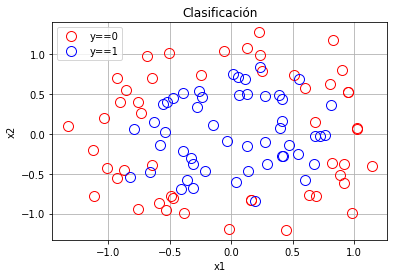

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import  Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.svm import  SVR
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

opc=2

#seleccionamos  como menu la opcion que queremos de los siguientes casos
if opc == 1:
  # Extraemos vectores
  df = pd.read_csv('df_clasificacion_1.cvs')
  x1=np.asanyarray(df[['x1']])
  x2=np.asanyarray(df[['x2']])

elif opc==2:
  # Extraemos vectores
  df = pd.read_csv('df_clasificacion_2.cvs')
  x1=np.asanyarray(df[['x1']])
  x2=np.asanyarray(df[['x2']])

elif opc==3:
  # Extraemos vectores
  df = pd.read_csv('df_clasificacion_3.cvs')
  x1=np.asanyarray(df[['x1']])
  x2=np.asanyarray(df[['x2']])
else:
  # Extraemos vectores
  df = pd.read_csv('df_act2')
  x1=np.asanyarray(df[['x1']])
  x2=np.asanyarray(df[['x2']])

###en el caso inventado, x1=presion atmosferica, con  umbral de que si pasa de 0.8
## es 0.0 y x2=velocidad del viento es menos a 1.0 tambien es 0.0, si sobre´sa o baja de los limites  es 1.0 la salida
##en si es clasificacion de  probabilidad de tormenta o no

x=np.concatenate((x1,x2),axis=1)
y=np.asanyarray(df['y'])

#x_ent, x_gen, y_ent, y_gen = train_test_split(x,y)

x_train,x_test,y_train,y_test=train_test_split(x,y)

plt.figure()
plt.grid()
plt.title('Clasificación')

plt.plot(x[y==0,0],x[y==0,1],'ro',fillstyle='none',markersize=10)
plt.plot(x[y==1,0],x[y==1,1],'bo',fillstyle='none',markersize=10)

plt.legend(['y==0','y==1'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()



In [64]:
print(df)

         x1        x2    y
0  1.355599  0.319166  0.0
1 -0.432749  1.555903  1.0
2 -1.513017  1.633290  1.0
3  0.843565  0.823009  0.0
4  1.156294  0.724569  0.0
5 -1.278285  1.827992  1.0
6  1.660910  0.362010  0.0
7  0.164074  1.267241  1.0
8  1.846488  0.127986  0.0


In [66]:
def Resultados (model,x_test,y_test):
  y_pred = model.predict(x_test)
#graficas
  plt.figure()
  plt.grid()
  plt.title('clasificacion')

  plt.plot(x_test[y_test==0,0],x_test[y_test==0,1],'ro',fillstyle='none',markersize=10)
  plt.plot(x_test[y_test==1,0],x_test[y_test==1,1],'bo',fillstyle='none',markersize=10)

  plt.plot(x_test[y_pred==0,0],x_test[y_pred==0,1],'rx')
  plt.plot(x_test[y_pred==1,0],x_test[y_pred==1,1],'bx')

  plt.legend(['y==0','y==1','yp==0','yp==1'])
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()
#metricas
  print('metricas: \n',metrics.classification_report(y_test,y_pred))
  #matriz de confusión
  print('consufision matrix: \n',metrics.confusion_matrix(y_test,y_pred))
#curvas ROC
  metrics.plot_roc_curve(model,x_test,y_test)
  plt.title('curva R0C')
  plt.show()

Score 0.8
Score 0.56


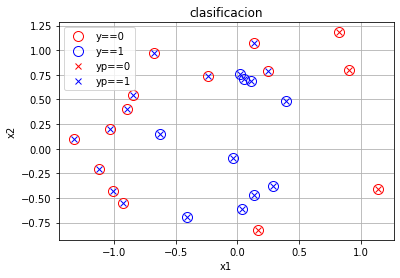

metricas: 
               precision    recall  f1-score   support

         0.0       1.00      0.27      0.42        15
         1.0       0.48      1.00      0.65        10

    accuracy                           0.56        25
   macro avg       0.74      0.63      0.53        25
weighted avg       0.79      0.56      0.51        25

consufision matrix: 
 [[ 4 11]
 [ 0 10]]


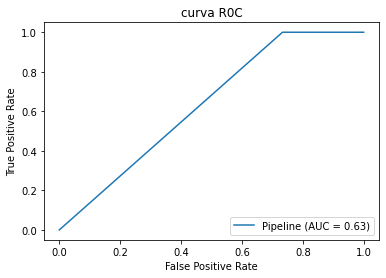

In [67]:

model=Pipeline([('scaler',StandardScaler()),('cla',DecisionTreeClassifier(max_depth=2))])
model.fit(x_train,y_train)
print('Score',model.score(x_train,y_train))
print('Score',model.score(x_test,y_test))

Resultados(model,x_test,y_test)

Score 0.84
Score 0.84


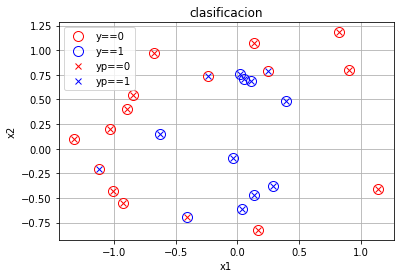

metricas: 
               precision    recall  f1-score   support

         0.0       0.92      0.80      0.86        15
         1.0       0.75      0.90      0.82        10

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25

consufision matrix: 
 [[12  3]
 [ 1  9]]


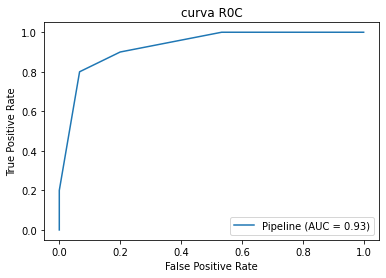

In [68]:
model=Pipeline([('scaler',StandardScaler()),('cla',KNeighborsClassifier(n_neighbors=5))])
model.fit(x_train,y_train)
print('Score',model.score(x_train,y_train))
print('Score',model.score(x_test,y_test))
Resultados(model,x_test,y_test)

Score 0.8133333333333334
Score 0.92


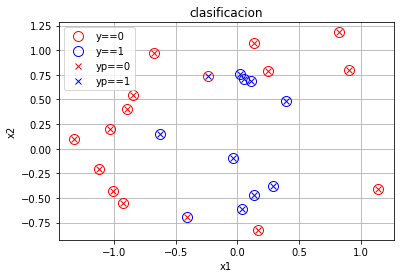

metricas: 
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        15
         1.0       0.90      0.90      0.90        10

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

consufision matrix: 
 [[14  1]
 [ 1  9]]


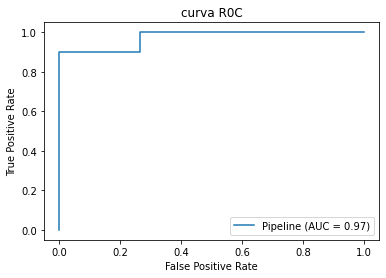

In [69]:
model=Pipeline([('scaler',StandardScaler()),
                ('cla',SVC(C=0.3,kernel='rbf'))])
model.fit(x_train,y_train)
print('Score',model.score(x_train,y_train))
print('Score',model.score(x_test,y_test))
Resultados(model,x_test,y_test)

Score 0.5333333333333333
Score 0.4


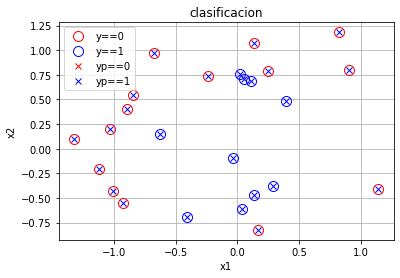

metricas: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.40      1.00      0.57        10

    accuracy                           0.40        25
   macro avg       0.20      0.50      0.29        25
weighted avg       0.16      0.40      0.23        25

consufision matrix: 
 [[ 0 15]
 [ 0 10]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


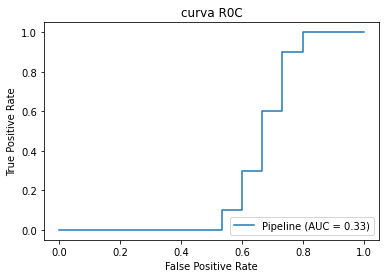

In [70]:
from sklearn.neural_network import MLPClassifier
model=Pipeline([('scaler',StandardScaler()),
                ('reg',MLPClassifier(hidden_layer_sizes=(3),solver='adam',max_iter=800,))])
model.fit(x_train,y_train)
print('Score',model.score(x_train,y_train))
print('Score',model.score(x_test,y_test))
Resultados(model,x_test,y_test)